# ワードクラウド

## 前準備

必要なライブラリのインポート

In [11]:
import wordcloud as wc

import pandas as pd
import matplotlib.pyplot as plt

データの読み込み

In [4]:
qus_title_terms = pd.read_csv('../src_ex/qus_title_terms.csv')
qus_body_terms = pd.read_csv('../src_ex/qus_body_terms.csv')
ans_body_terms = pd.read_csv('../src_ex/ans_body_terms.csv')

関数の定義

In [19]:
path_to_font = '/home/tat/.local/share/fonts/ipaex/ipaexg.ttf'

def drawwc(terms, output_path, **kwargs):
    wc_base = wc.WordCloud(
        font_path = path_to_font,
        width = 1000,
        height = 1000,
        background_color = None,
        mode='RGBA',
        **kwargs
    )

    if isinstance(terms, dict):
        wc_ins = wc_base.generate_from_frequencies(terms)
    else:
        wc_ins = wc_base.generate_from_text(' '.join(terms))

    plt.imshow(wc_base)
    plt.axis('off')
    
    wc_ins_svg = wc_ins.to_svg(embed_font=True)
    with open(output_path, 'w') as f:
        f.write(wc_ins_svg)

データの確認

In [7]:
qus_title_terms

,質問ID,表題
0,512877,美人局
1,512877,被害
2,512877,振舞う
3,512877,最善
4,512879,離婚裁判
...,...,...
918103,838431,調査
918104,839052,名誉毀損事実
918105,839052,提示
918106,839909,自社株


In [8]:
qus_body_terms

,質問ID,質問本文
0,512877,美人局
1,512877,被害
2,512877,振舞う
3,512877,最善
4,512877,全裸等
...,...,...
13309805,839909,可能性
13309806,839909,個人
13309807,839909,法人
13309808,839909,教える


In [9]:
ans_body_terms

,回答ID,回答本文
0,1442622,共通
1,1442622,友人
2,1442622,郵便配達人
3,1442622,宅急便
4,1442622,考える
...,...,...
16491150,2199151,破産
16491151,2199151,業者
16491152,2199151,担当弁護士
16491153,2199151,債権届け


## 文章の種類ごと

質問の表題

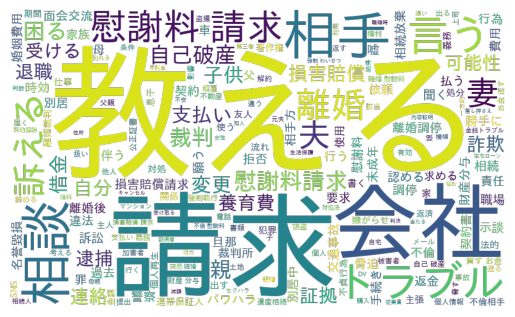

In [20]:
drawwc(qus_title_terms['表題'], 'dst/wc/qus_title_terms.svg')

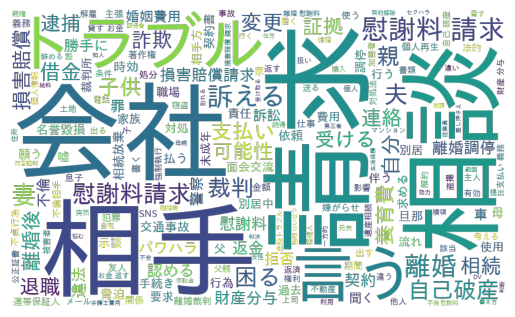

In [21]:
drawwc(qus_title_terms['表題'], 'dst/wc/qus_title_terms_2.svg', stopwords=['教える'])

質問の本文

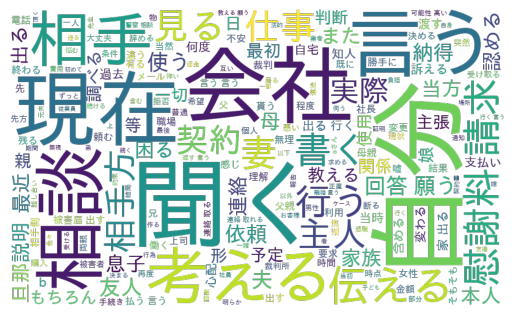

In [22]:
drawwc(qus_body_terms['質問本文'], 'dst/wc/qus_body_terms.svg')

回答の本文

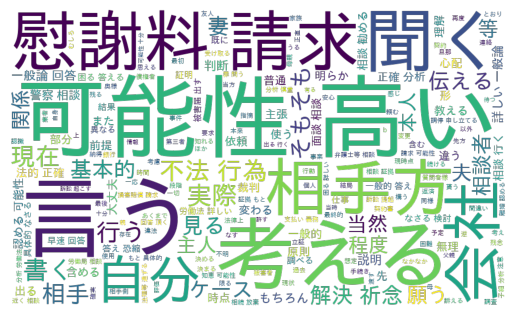

In [23]:
drawwc(ans_body_terms['回答本文'], 'dst/wc/ans_body_terms.svg')